In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt
import sklearn
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline
import warnings 
warnings.filterwarnings("ignore")  #ignorar los mensajed de error al crear los plots

In [2]:
df = pd.read_csv("homes.csv")
df.info() #ver q se importo bien el CSV

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [3]:
corr=df.corr()
_,ax=sklearn. plt.subplots(figsize=(20,10))
mask = np.triu(np.ones_like(corr, dtype=bool))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(corr,annot=True,mask=mask,cmap=cmap)


NameError: name 'plt' is not defined

In [ ]:
#Vamos a Implementar 4 regresiones lineares:
#1- sqft_living v. price
#2- sqft_above v. price
#3- grade v. price
#4- sqft_living15 v. price

In [ ]:
train_data,test_data=train_test_split(df,train_size=0.85,random_state=3)
reg=linear_model.LinearRegression()
x=np.array(train_data['sqft_living']).reshape(-1,1)
y=np.array(train_data['price']).reshape(-1,1)
reg.fit(x,y)

xt=np.array(test_data['sqft_living']).reshape(-1,1)
yt=np.array(test_data['price']).reshape(-1,1)
pred=reg.predict(xt)
print('sqft_living v. price')
mean_squared_error=metrics.mean_squared_error(yt,pred)
print('Sqaured mean error', np.sqrt(mean_squared_error))


NameError: name 'train_test_split' is not defined

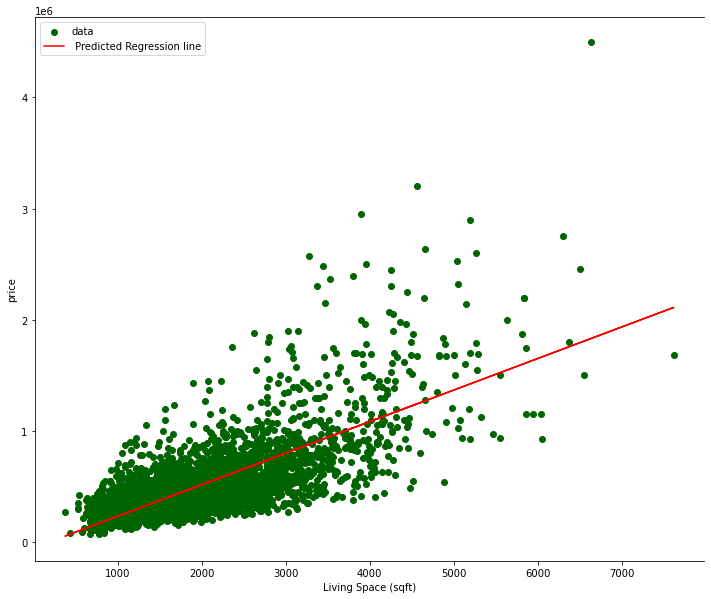

In [ ]:
_, ax = plt.subplots(figsize= (12, 10))
plt.scatter(xt, yt, color= 'darkgreen', label = 'data')
plt.plot(xt, reg.predict(xt), color='red', label= ' Predicted Regression line')
plt.xlabel('Living Space (sqft)')
plt.ylabel('price')
plt.legend()
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

In [ ]:
train_data,test_data=train_test_split(df,train_size=0.85,random_state=3)
reg=linear_model.LinearRegression()
x=np.array(train_data['sqft_above']).reshape(-1,1)
y=np.array(train_data['price']).reshape(-1,1)
reg.fit(x,y)

xt=np.array(test_data['sqft_above']).reshape(-1,1)
yt=np.array(test_data['price']).reshape(-1,1)
pred=reg.predict(xt)

print('sqft_above v. price')
mean_squared_error=metrics.mean_squared_error(yt,pred)
print('Sqaured mean error', np.sqrt(mean_squared_error))


sqft_above v. price
Sqaured mean error 272017.9674679368


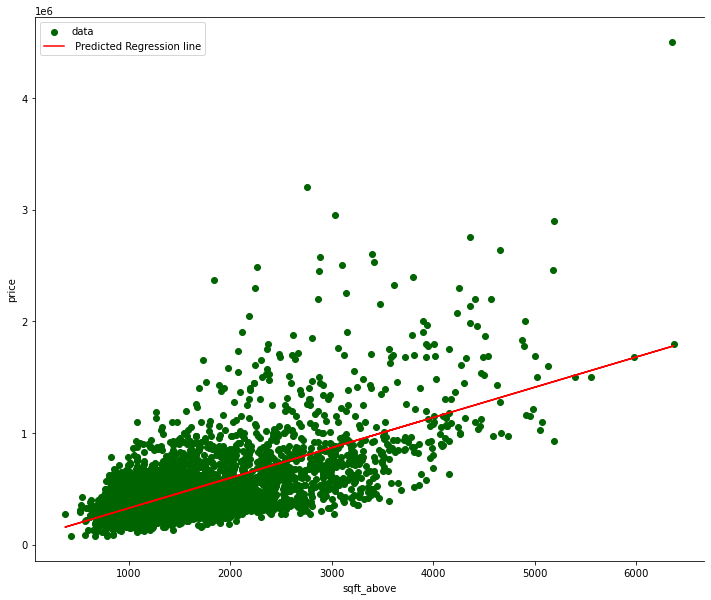

In [ ]:
_, ax = plt.subplots(figsize= (12, 10))
plt.scatter(xt, yt, color= 'darkgreen', label = 'data')
plt.plot(xt, reg.predict(xt), color='red', label= ' Predicted Regression line')
plt.xlabel('sqft_above')
plt.ylabel('price')
plt.legend()
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

In [ ]:
train_data,test_data=train_test_split(df,train_size=0.85,random_state=3)
reg=linear_model.LinearRegression()
x=np.array(train_data['grade']).reshape(-1,1)
y=np.array(train_data['price']).reshape(-1,1)
reg.fit(x,y)

xt=np.array(test_data['grade']).reshape(-1,1)
yt=np.array(test_data['price']).reshape(-1,1)
pred=reg.predict(xt)
print('grade v. price')
mean_squared_error=metrics.mean_squared_error(yt,pred)
print('Sqaured mean error', np.sqrt(mean_squared_error))


grade v. price
Sqaured mean error 251362.88440478657


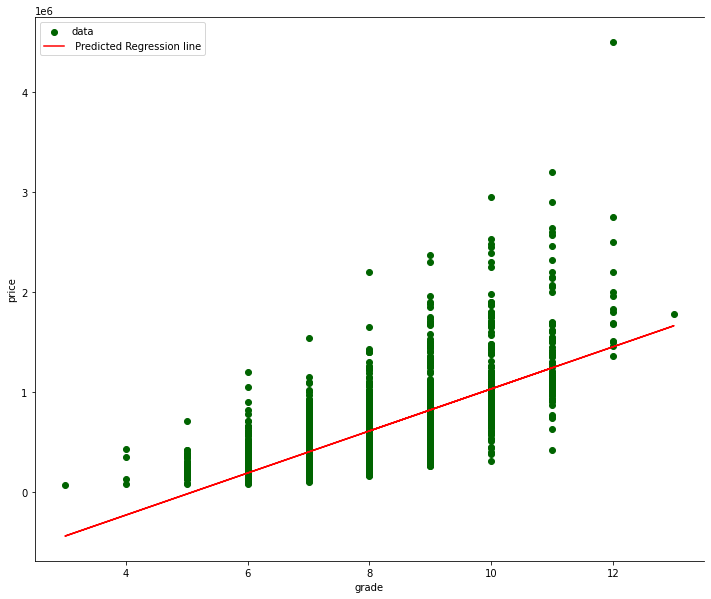

In [ ]:
_, ax = plt.subplots(figsize= (12, 10))
plt.scatter(xt, yt, color= 'darkgreen', label = 'data')
plt.plot(xt, reg.predict(xt), color='red', label= ' Predicted Regression line')
plt.xlabel('grade')
plt.ylabel('price')
plt.legend()
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

In [ ]:
train_data,test_data=train_test_split(df,train_size=0.85,random_state=3)
reg=linear_model.LinearRegression()
x=np.array(train_data['sqft_living15']).reshape(-1,1)
y=np.array(train_data['price']).reshape(-1,1)
reg.fit(x,y)

xt=np.array(test_data['sqft_living15']).reshape(-1,1)
yt=np.array(test_data['price']).reshape(-1,1)
pred=reg.predict(xt)
print('sqft_living15 v. price')
mean_squared_error=metrics.mean_squared_error(yt,pred)
print('Sqaured mean error', np.sqrt(mean_squared_error))


sqft_living15 v. price
Sqaured mean error 273221.30791361356


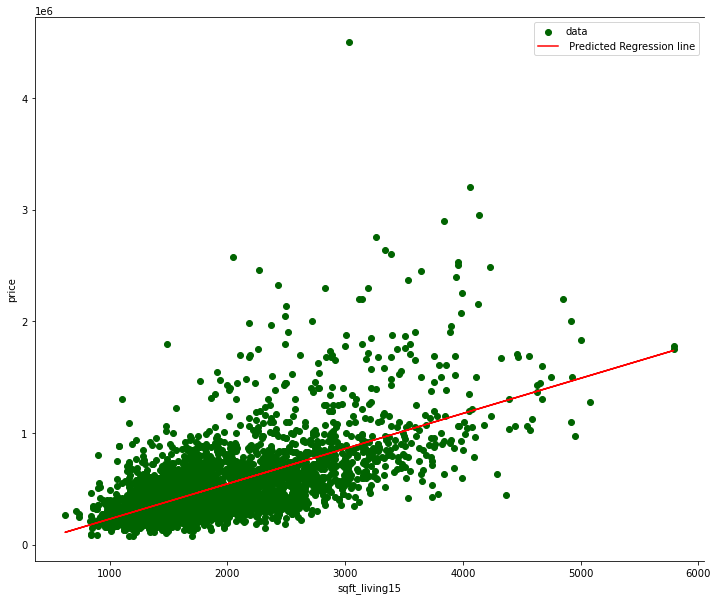

In [ ]:
_, ax = plt.subplots(figsize= (12, 10))
plt.scatter(xt, yt, color= 'darkgreen', label = 'data')
plt.plot(xt, reg.predict(xt), color='red', label= ' Predicted Regression line')
plt.xlabel('sqft_living15')
plt.ylabel('price')
plt.legend()
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['right'].set_visible(False)